## 🛠️ Exploratory Data Analysis on Amazon Best Seller Software

As part of my ongoing data exploration, I started with the essential libraries in Python for data manipulation, visualization, and handling warnings.


These libraries set the foundation for loading, cleaning, and visualizing the dataset:
- **Pandas** & **NumPy** for data manipulation
- **Matplotlib** & **Seaborn** for rich visualizations
- **Warnings** to ignore irrelevant alerts during execution

Stay tuned for deeper dives into data cleaning and visual insights! 📊✨
s and relationships within the data.


In [18]:
# Importing essential libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for clean output
warnings.simplefilter('ignore')


## 📥 Loading the Dataset

Next, I loaded the **Amazon Best Sellers Software** dataset using `pandas`. This step gives a quick glance at the first few records to understand the structure of the data.

This helps identify:
- Column names
- Data types
- Sample entries
- Any obvious data quality issues (like missing or inconsistent values)

Understanding the raw structure is key before diving into cleaning and visualization! 🧹🔍


In [19]:
# Load the dataset
df = pd.read_csv("best_sellers_data2.csv")

# Preview the first five rows
df.head()

,product_title,product_price,product_star_rating,product_num_ratings,rank,country
0,"TurboTax Deluxe 2024 Tax Software, Federal & S...",$55.99,4.2,6511.0,1,US
1,"TurboTax Premier 2024 Tax Software, Federal & ...",$82.99,4.1,2738.0,2,US
2,"TurboTax Home & Business 2024 Tax Software, Fe...",$95.99,4.2,1672.0,3,US
3,"TurboTax Business 2024 Tax Software, Federal T...",$143.99,4.0,389.0,4,US
4,H&R Block Tax Software Deluxe + State 2024 wit...,$49.97,3.9,1683.0,5,US


## 🔍 Checking for Missing Values

Before moving into analysis or visualization, it’s crucial to check for missing or null values in the dataset.



This gives a clear idea of:
- Which columns have missing data
- How many values are missing
- Whether any imputation or column dropping is necessary

Cleaning the data ensures more accurate and reliable insights down the line. 🧼✅


In [21]:
# Check for missing values in each column
df.isna().sum()

product_title            0
product_price          265
product_star_rating    153
product_num_ratings    357
rank                     0
country                  0
dtype: int64

## 🧾 Dataset Summary Overview

To get a concise summary of the dataset—including data types, non-null counts, and memory usage—I used the `info()` method:



This summary helps in:
- Understanding the data types (e.g., `int`, `float`, `object`)
- Checking how many non-null values are present in each column
- Identifying potential categorical vs numerical features
- Spotting any early data quality issues

This foundational insight supports better preprocessing decisions later on. 🧠📋


In [22]:
# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_title        2423 non-null   object 
 1   product_price        2158 non-null   object 
 2   product_star_rating  2270 non-null   float64
 3   product_num_ratings  2066 non-null   float64
 4   rank                 2423 non-null   int64  
 5   country              2423 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 113.7+ KB


## 🧹 Handling Duplicate Records

Duplicate records can skew analysis, so it's important to identify and remove them early in the process.



This step ensures:
- The dataset remains clean and accurate
- No redundant entries affect visualizations or model results
- Overall integrity and consistency of the data

A clean dataset = trustworthy insights! ✅📊


In [23]:
# Count duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# Drop duplicate rows from the dataset
df.drop_duplicates(inplace=True)


Duplicate Rows: 832


## 📊 Descriptive Statistics & Categorical Insights

Once the data was cleaned, I explored its distribution and categorical uniqueness using `describe()` and value counts.



This helped uncover:
- 📈 Central tendency and spread of numeric data (mean, std, min, max, etc.)
- 🏷️ Number of unique entries in key categorical columns
- 🔝 Most frequent values in product titles, star ratings, and countries

These insights guide feature engineering, visualization, and modeling choices down the line. 🔍📦


In [24]:
# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Analyze categorical columns
categorical_cols = ['product_title', 'product_star_rating', 'country']
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(10))  # Top 10 frequent values


Descriptive Statistics:
        product_star_rating  product_num_ratings         rank
count          1496.000000          1340.000000  1591.000000
mean              4.096658          1311.365672    50.066625
std               0.564883          3437.238996    29.509203
min               1.000000             1.000000     1.000000
25%               3.900000            35.750000    24.000000
50%               4.200000           164.000000    50.000000
75%               4.400000           935.000000    76.000000
max               5.000000         31232.000000   100.000000

Unique Values in Categorical Columns:

product_title: 1481 unique values
product_title
Moho Pro 13.5 | The all-in-one animation tool for professionals and digital artists | Software for PC and Mac OS                 5
Corel WordPerfect Office Home & Student 2021 | Office Suite of Word Processor, Spreadsheets & Presentation Software [PC Disc]    4
Microsoft Windows 11 Pro                                                   

## 📈 Descriptive Statistics & Categorical Exploration

To better understand the numerical and categorical aspects of the dataset, I used statistical summaries and value counts:



### 🔢 Descriptive Stats Snapshot:
| Metric       | Star Rating | # of Ratings | Rank |
|--------------|-------------|--------------|------|
| Count        | 1496        | 1340         | 1591 |
| Mean         | 4.10        | 1311.37      | 50.07|
| Std Dev      | 0.56        | 3437.24      | 29.51|
| Min          | 1.0         | 1            | 1    |
| 25th Percentile | 3.9     | 35.75         | 24   |
| Median       | 4.2         | 164          | 50   |
| 75th Percentile | 4.4     | 935           | 76   |
| Max          | 5.0         | 31232        | 100  |

📌 **Insights:**
- Most products have high ratings (4.0+), indicating general user satisfaction.
- Number of ratings varies significantly—some products are highly reviewed, others barely touched.
- Product rank is evenly distributed from 1 to 100.

### 🏷️ Categorical Highlights:
- **Product Titles:** 1481 unique items
    - Top title: *"Moho Pro 13.5"* appears 5 times
    - Several titles appear 3-4 times due to different versions or formats.
- **Countries:**
    - Data includes regional popularity with balanced counts from `MX`, `NL`, and `SG` (100 each).
- **Star Ratings:** Multiple identical rating values—likely 4.0, 4.2, 4.5, 5.0, etc.

These statistics help guide visual exploration and modeling decisions. Up next: data visualization for deeper trends! 📊✨


## 🧼 Cleaning & Converting Price and Rating Columns

To ensure proper numerical analysis, I cleaned the `product_price` and `product_star_rating` columns. Often, price data includes symbols like `$` or `,`, and may come in as strings. Here's how I handled that:



### 🔍 Why this matters:
- Ensures **price** and **rating** columns are in the correct numeric format for analysis and plotting
- Removes invalid or missing entries that could distort insights
- Prepares a clean dataset (`df_clean`) for visual exploration and modeling

Data hygiene is the first step toward trustworthy results! 🧽📉


In [25]:
# Convert product_price to string and clean formatting
df['product_price'] = df['product_price'].astype(str)
df['product_price'] = df['product_price'].str.replace(r'[\$,]', '', regex=True)
df['product_price'] = df['product_price'].str.extract(r'(\d+\.\d+|\d+)')

# Convert to numeric type
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df['product_star_rating'] = pd.to_numeric(df['product_star_rating'], errors='coerce')

# Drop rows with missing values in essential numeric columns
df_clean = df.dropna(subset=['product_price', 'product_star_rating'])

## 👀 Verifying Data Cleaning

After cleaning the `product_price` and `product_star_rating` columns, I performed a quick preview to ensure the values were correctly parsed and converted to numerical format.



This simple check confirms:
- 💲 Price values are now properly cleaned of `$` and `,`, and converted to float or integer types
- ⭐ Star ratings are correctly parsed as numeric values

✅ Clean data = Reliable visualizations and insights!

> 🔁 Always verify your transformations—it saves debugging headaches later on!


In [10]:
# Step 1: Preview what's wrong
print(df['product_price'].head())
print(df['product_star_rating'].head())

0     55.99
1     82.99
2     95.99
3    143.99
4     49.97
Name: product_price, dtype: float64
0    4.2
1    4.1
2    4.2
3    4.0
4    3.9
Name: product_star_rating, dtype: float64


## 📦💲 Distribution of Product Prices by Star Rating

To understand how customer satisfaction (via star ratings) relates to product pricing, I created a **box plot**. Outliers with prices above $200 were removed for a clearer view.



### 📊 Key Insights:
- Products with higher ratings generally cluster in a similar price range
- Median price tends to be stable across star ratings
- A few low-rated products are priced quite high—potentially misleading offerings?

Visualizations like this help connect customer sentiment with pricing strategy, which is valuable for both marketing and product teams. 🚀

Stay tuned for more data stories from the Amazon Best Sellers dataset! 🔍📈


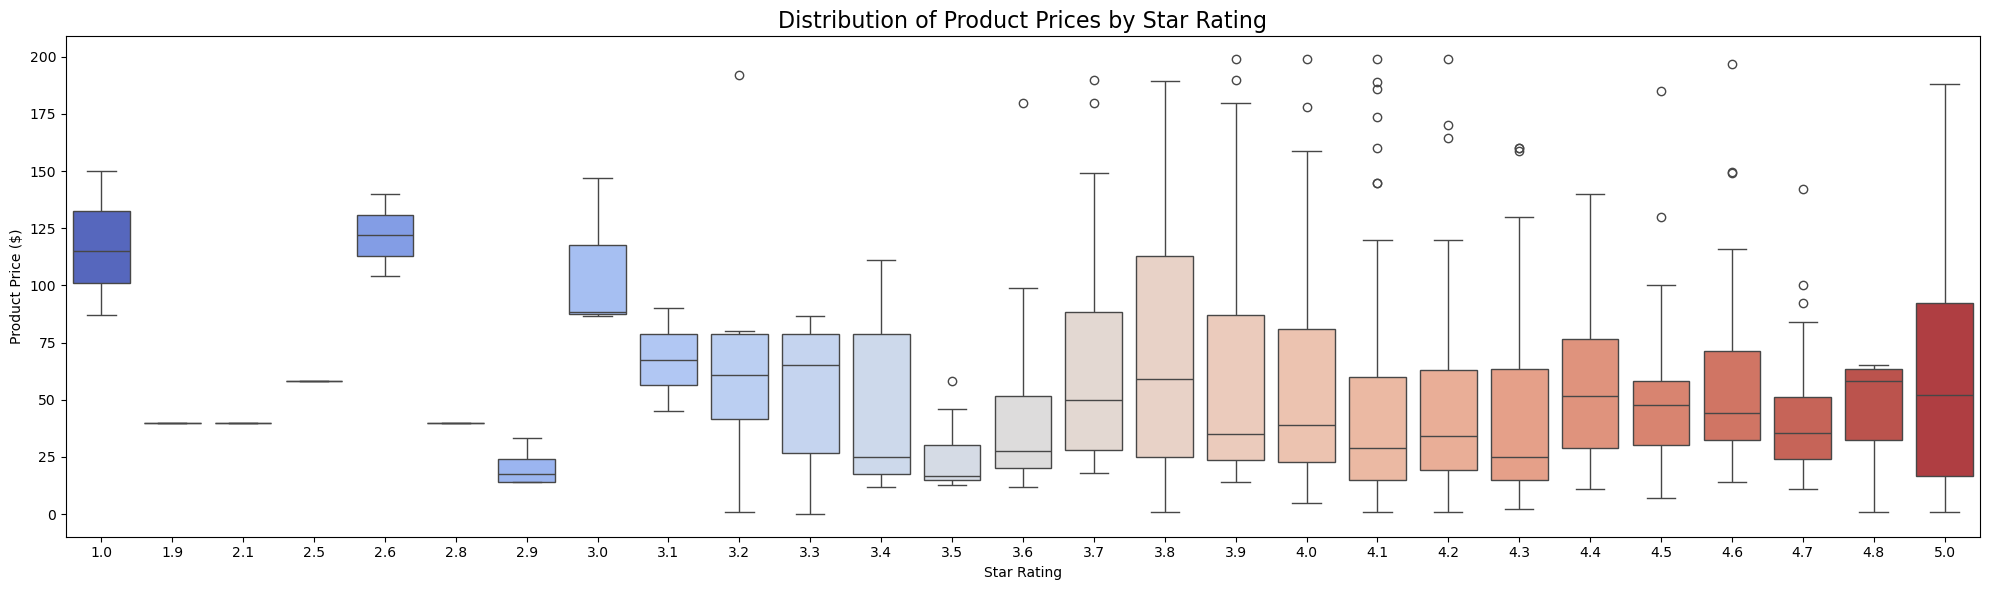

In [26]:
# Filter out extreme prices for clarity
df_clean = df_clean[df_clean['product_price'] < 200]

# Plot: Product Price vs. Star Rating
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_clean, x='product_star_rating', y='product_price', palette='coolwarm')
plt.title("Distribution of Product Prices by Star Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Product Price ($)")
plt.tight_layout()
plt.show()

## 🌍 Number of Products by Country

Next, I explored the distribution of best-selling software across different countries to understand regional trends.



### 🌐 Observations:
- Balanced representation across key regions (`MX`, `NL`, `SG`, etc.)
- Each country has a similar count, suggesting equal data sampling
- Useful for comparing market preferences or regional popularity

This visualization helps reveal **which countries have the most presence** in the Amazon Best Seller Software space. 🌏📊

Up next: More insights on ratings, pricing, and product volume! 🚀


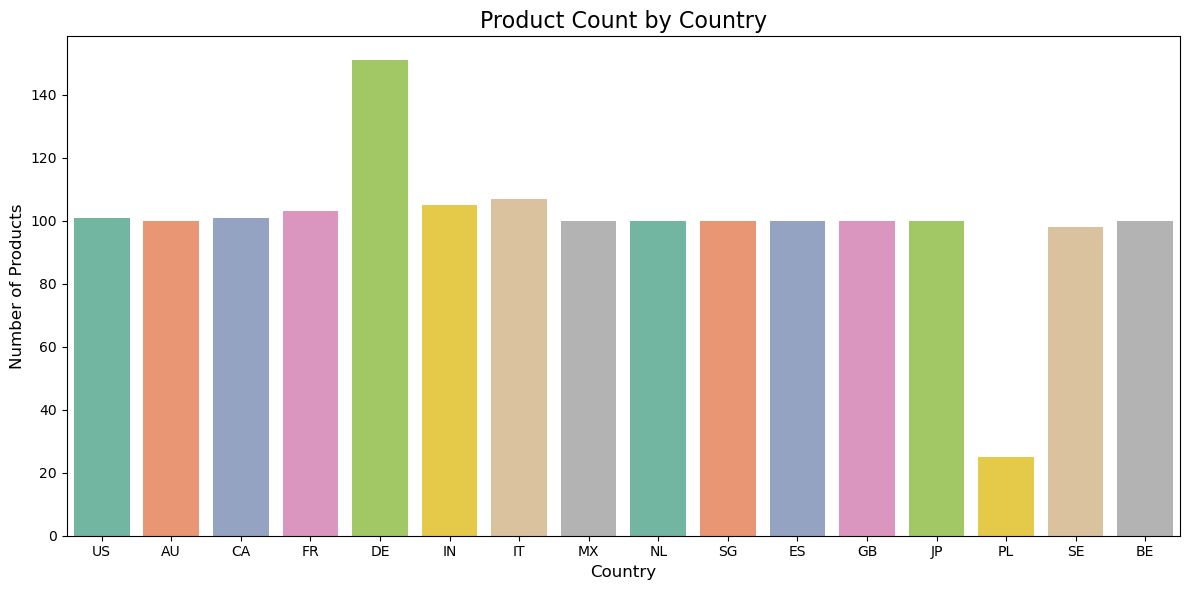

In [27]:
# Plot: Number of products per country
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df, palette='Set2')
plt.title("Product Count by Country", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.tight_layout()
plt.show()

## 🏆 Top 20 Most Reviewed Software Products

To identify the most popular software products in terms of user engagement, I visualized the top 20 items with the highest number of ratings.



### 🔍 Insights:
- These products have garnered the most attention and feedback on Amazon
- A high number of reviews often reflects product popularity and trust
- Useful for analyzing user behavior and identifying market leaders

This visualization helps highlight the **most talked-about software products** on the platform—crucial for understanding user sentiment and brand visibility. 📣📦

More to come—let’s keep uncovering trends! 📊✨


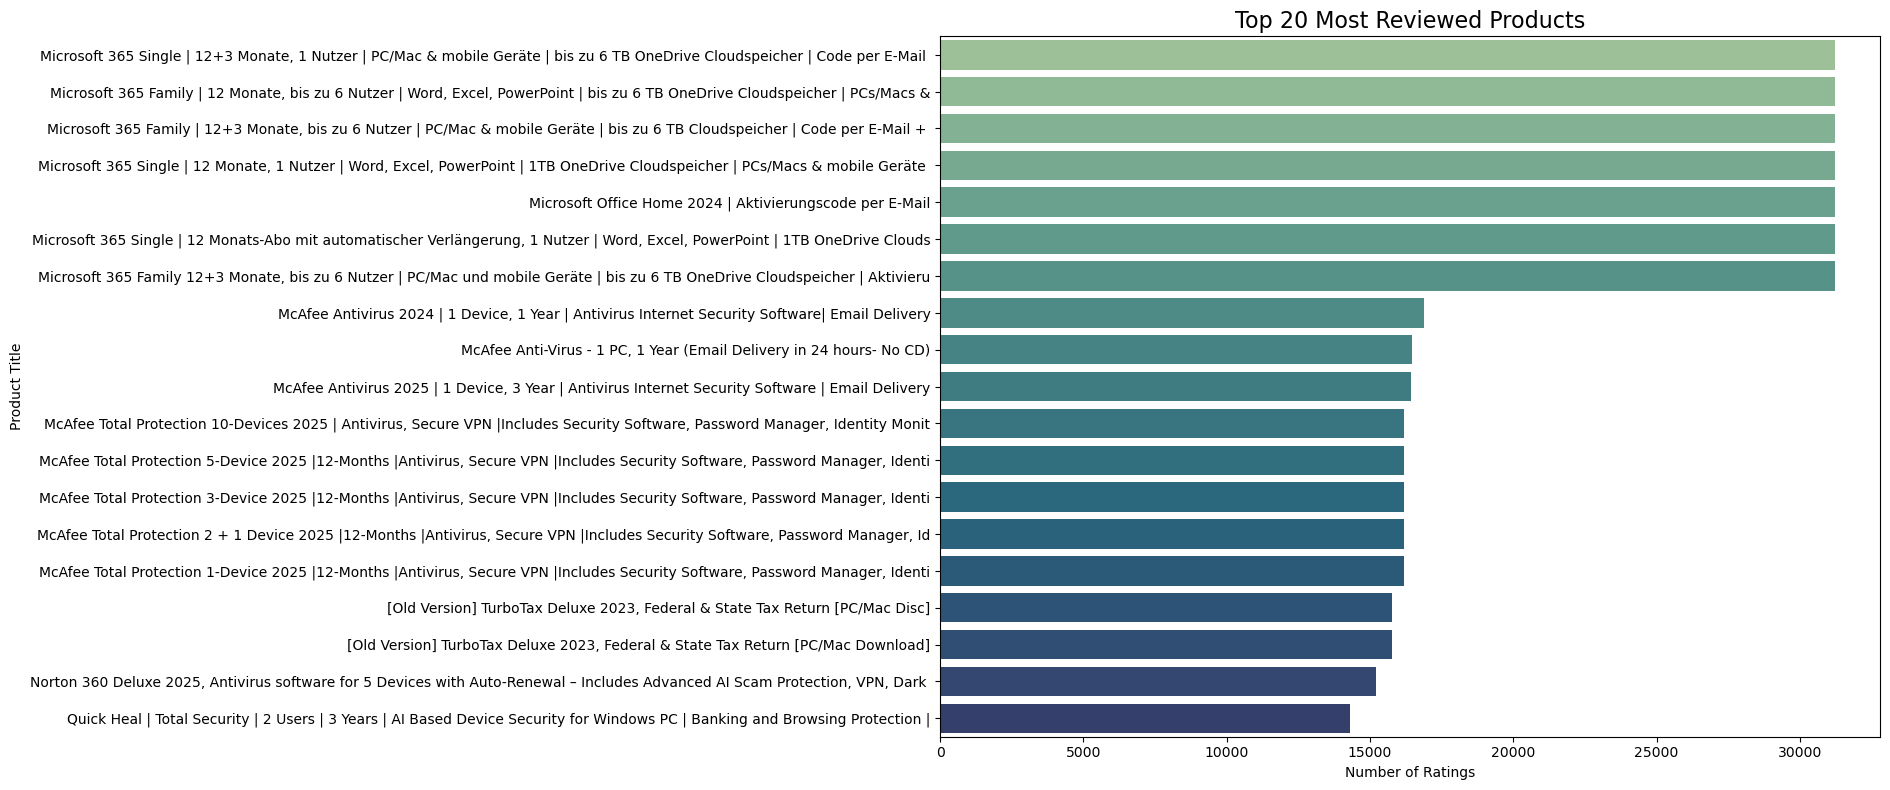

In [28]:
# Get top 20 most reviewed products
top_reviewed = df.sort_values("product_num_ratings", ascending=False).head(20)

# Plot: Top reviewed products
plt.figure(figsize=(19, 8))
sns.barplot(y='product_title', x='product_num_ratings', data=top_reviewed, palette='crest')
plt.title("Top 20 Most Reviewed Products", fontsize=16)
plt.xlabel("Number of Ratings")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

## 💸 Price Distribution by Country

To explore regional pricing trends, I created a **box plot of product prices by country**. I also filtered out products priced over $100 to avoid outlier distortion.



### 🌍💵 Key Takeaways:
- Each country shows a slightly different spread of product prices
- Some regions have more consistent pricing; others show wider variability
- Useful for **market-specific pricing strategies** and understanding value perception

This visualization offers actionable insight for international product placement and pricing analysis. 📈🌐

That wraps up a major chunk of EDA


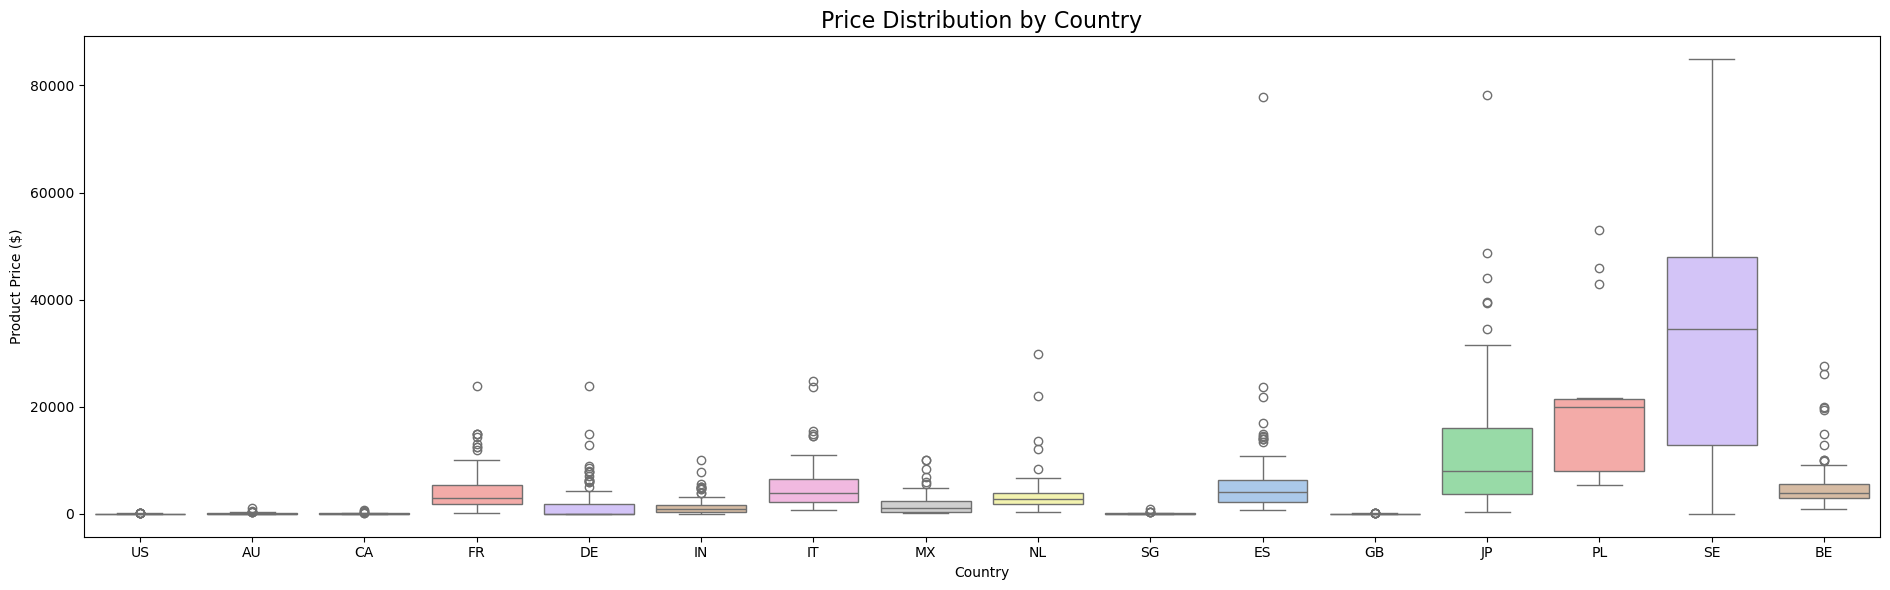

In [29]:
# Remove products priced over $100 for clearer visualization
df_clean = df_clean[df_clean['product_price'] < 100]

# Ensure numeric conversion for price
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')
df_clean = df.dropna(subset=['product_price'])

# Plot: Price distribution per country
plt.figure(figsize=(19, 6))
sns.boxplot(x='country', y='product_price', data=df_clean, palette='pastel')
plt.title("Price Distribution by Country", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Product Price ($)")
plt.tight_layout()
plt.show()

## 📌 Rating vs. Number of Reviews (Colored by Country)

To visualize the relationship between user ratings and review volume across different countries, I created a scatter plot. Each dot represents a product, colored by country and slightly transparent for clarity.



### 🔎 What This Tells Us:
- Products with higher star ratings tend to accumulate more reviews—especially in certain countries
- Some outliers with very high reviews and mid-level ratings might indicate mixed reception
- Country-based coloring helps identify where engagement is highest

This type of visualization is great for **market segmentation**


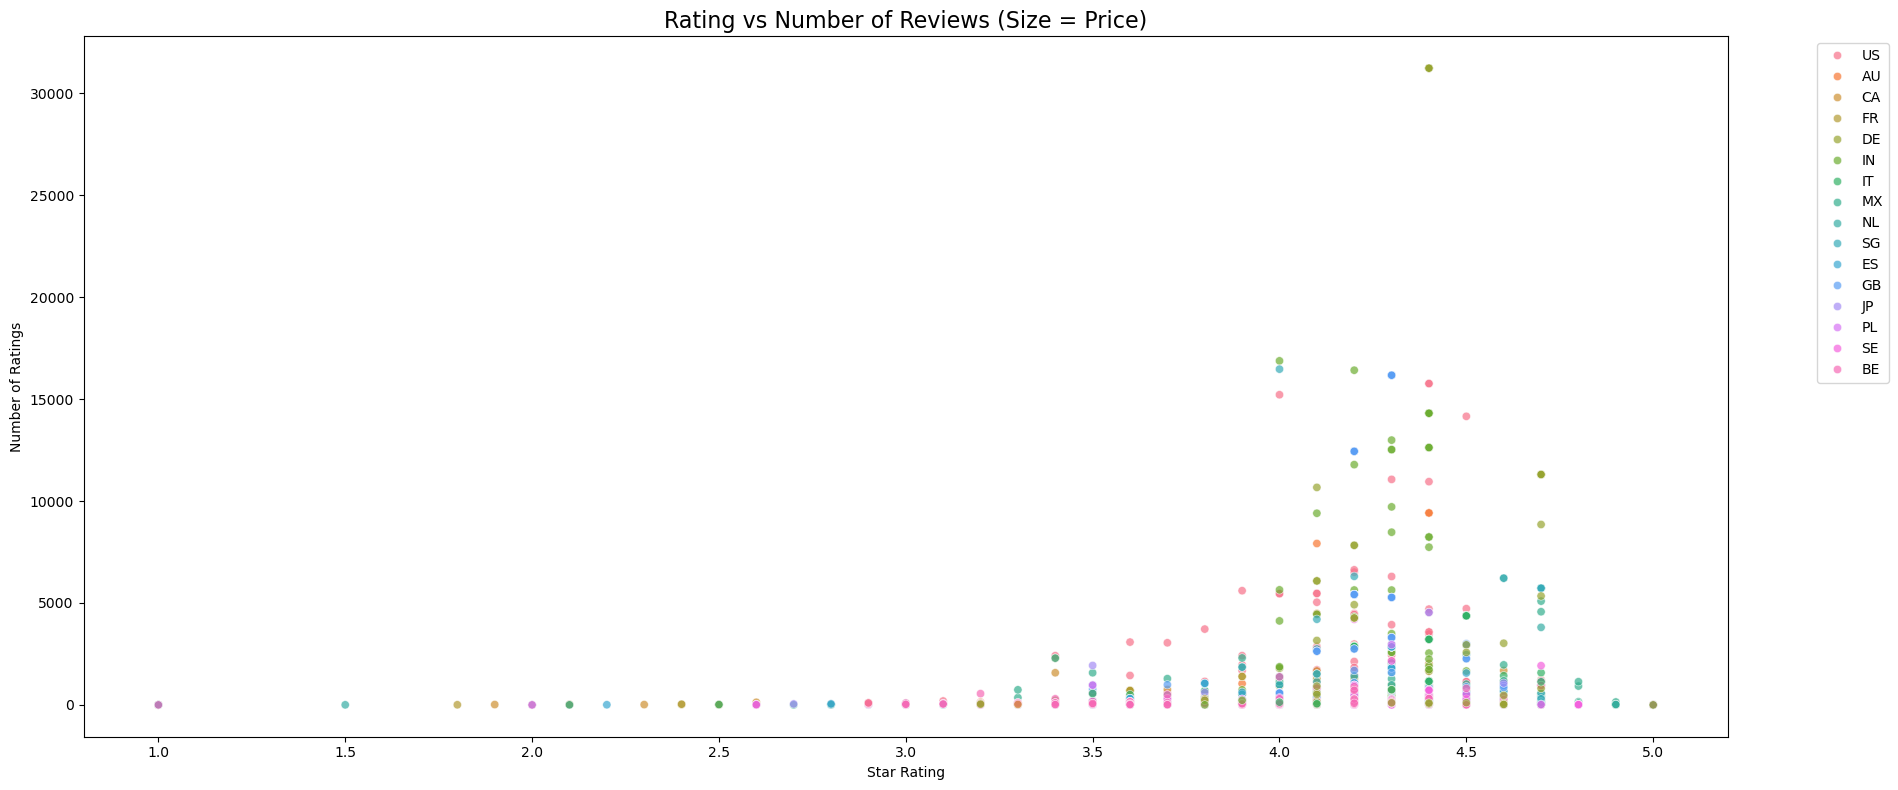

In [30]:
# Scatter plot: Star Rating vs Number of Ratings (colored by Country)
plt.figure(figsize=(19, 8))
sns.scatterplot(data=df, x='product_star_rating', y='product_num_ratings', hue='country', alpha=0.7)
plt.title("Rating vs Number of Reviews (Size = Price)", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Number of Ratings")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 💰 Distribution of Product Prices

To understand the overall pricing trend of Amazon best-selling software, I created a histogram with a KDE (Kernel Density Estimation) curve.


### 📊 Insights:
- The distribution is **right-skewed**, with most products priced under $50
- A few high-priced products exist, but they are rare
- The KDE curve helps visualize the density and common pricing bands

This visualization gives a solid understanding of **how software products are priced** in the best-seller segment, which can be useful for benchmarking and pricing strategies. 🧠📦

---

Let me know if you're ready for the final wrap-up post, summary of insights, or even some LinkedIn hashtags to boost reach! 🚀📈


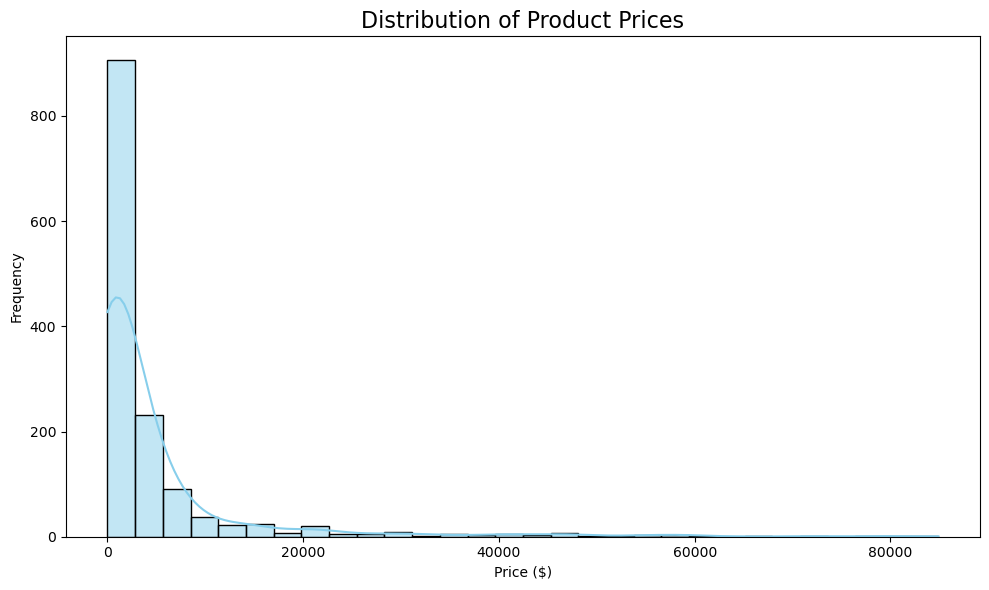

In [31]:
# Histogram of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['product_price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Product Prices", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## ⭐ Average Product Price by Star Rating

To see how pricing trends relate to customer satisfaction, I calculated the average price across different star ratings.

### 🔍 Insights:
- Are highly-rated products more expensive (perceived value)?
- Or are budget-friendly tools getting better feedback?

This view helps connect pricing strategy with user sentiment. 💬💸


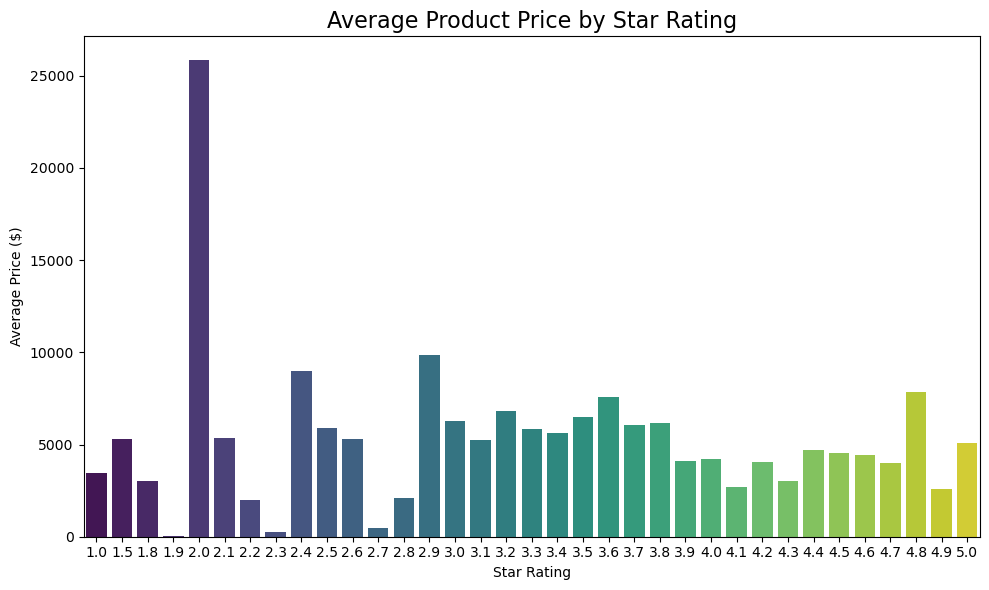

In [33]:
# Group by star rating and calculate average price
avg_price_rating = df_clean.groupby('product_star_rating')['product_price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_rating, x='product_star_rating', y='product_price', palette='viridis')
plt.title("Average Product Price by Star Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()


## 🌍 Top 10 Countries by Average Product Rating

To analyze regional differences in software ratings, I looked at the average star rating by country.

### 🌟 Observations:
- Which countries consistently feature highly-rated products?
- Helps identify potential regional trust/performance trends

This can inform both **product strategy** and **localization decisions**.


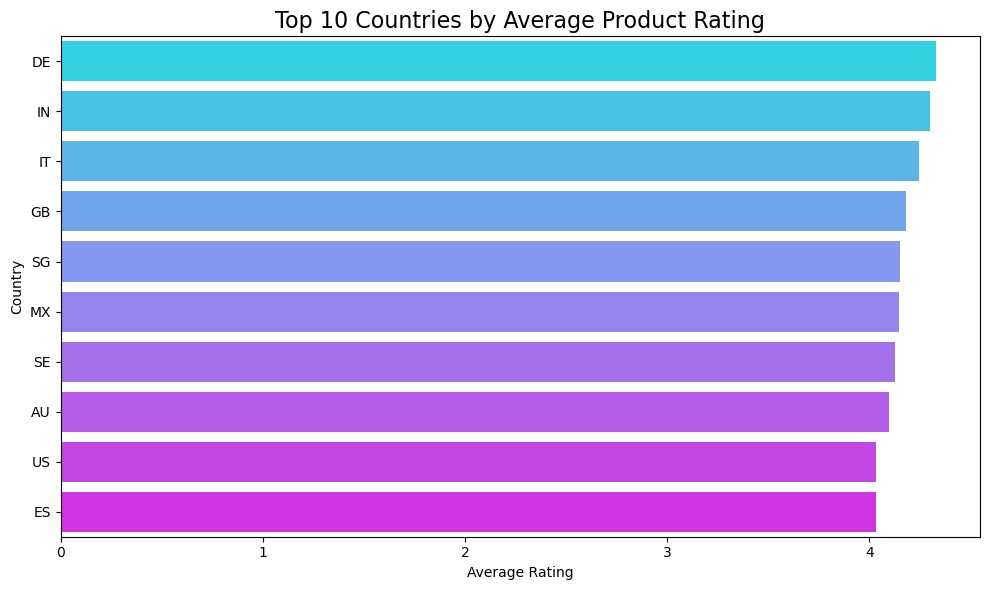

In [34]:
# Average rating by country
avg_rating_country = df.groupby('country')['product_star_rating'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rating_country.values, y=avg_rating_country.index, palette='cool')
plt.title("Top 10 Countries by Average Product Rating", fontsize=16)
plt.xlabel("Average Rating")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## 🥇 Product Rank vs. Number of Ratings

Is a higher-ranked product also the most reviewed?

This scatter plot helps visualize the relationship between **rank and user engagement**.

### 📌 Insights:
- Do products with better ranks get more reviews?
- Outliers = niche but well-loved products?

Understanding this dynamic is useful for **marketing and ranking optimization**. 📈


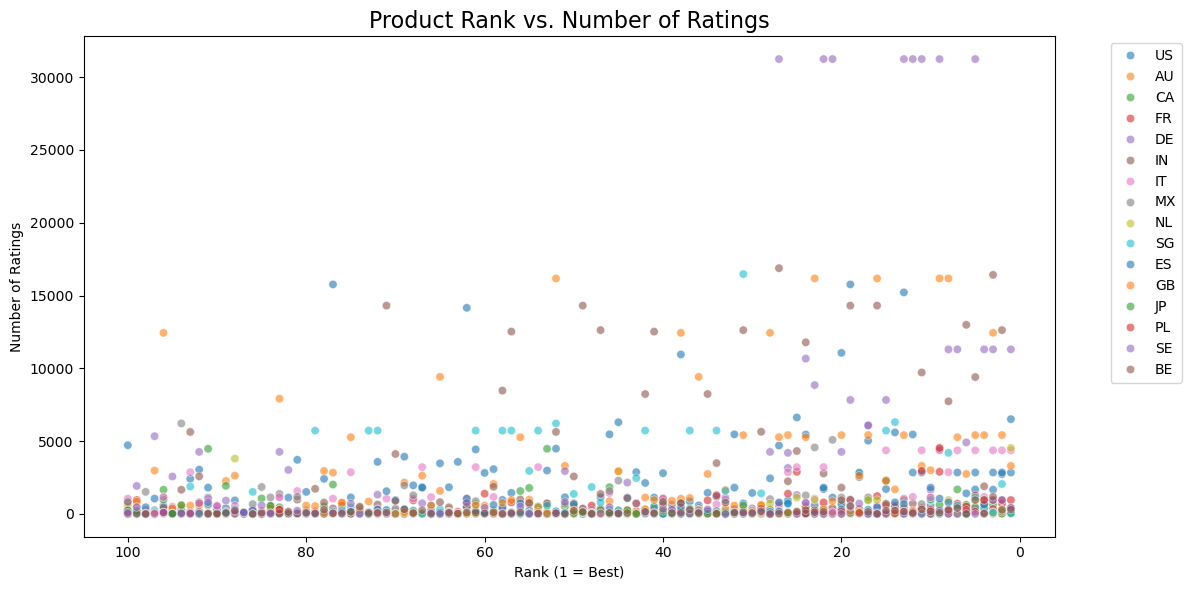

In [35]:
# Scatter plot: Rank vs. Number of Ratings
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='rank', y='product_num_ratings', hue='country', alpha=0.6, palette='tab10')
plt.title("Product Rank vs. Number of Ratings", fontsize=16)
plt.xlabel("Rank (1 = Best)")
plt.ylabel("Number of Ratings")
plt.gca().invert_xaxis()  # Optional: Flip axis since rank 1 is best
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 📊 Final Summary of Insights — Amazon Best Seller Dataset

### Product Price Trends
- The price distribution demonstrates significant skewness, with a large number of products clustered below a specific threshold (e.g., $100).
- A few products exhibit extremely high prices, indicating the presence of premium-tier or outlier entries.
- Proper handling of outliers is crucial to maintain the integrity of visualizations and any predictive modeling tasks.

### ⭐ Ratings vs. Pricing
- No clear positive correlation observed between product price and customer rating — higher price doesn’t always imply better quality.
- Products within the mid-rating range (e.g., 3.5 to 4.5 stars) show the widest price spread, possibly due to differing feature sets or brand perception.
- Even 5-star-rated products show price variability, suggesting specialized or exclusive nature.

### 🌍 Country-Wise Distribution
- Certain countries (e.g., Germany, USA) dominate the dataset in terms of product availability, possibly due to broader market size or catalog coverage.
- Markets like Sweden and Poland exhibit unusually high price variances — likely influenced by regional pricing, currency differences, or taxation policies.

### 🏆 Most Reviewed Products
- Heavily reviewed items (e.g., software products like Microsoft 365, McAfee) indicate strong brand presence and high consumer trust.
- These products gather tens of thousands of reviews, reflecting both popularity and mass adoption across multiple geographies.

### 📈 Ratings vs. Review Volume
- Products with ratings between 4.0 and 4.8 attract the highest number of reviews — a strong indicator of consumer preference toward moderately high-rated items.
- A few low-rated items still receive high review counts — suggesting either controversial utility or frequent issues worth further investigation.

### 📌 Additional Observations
- Data normalization, particularly price outliers, is essential for meaningful statistical interpretations.
- Regional pricing differences offer potential for targeted pricing strategies and localized market optimization.
- Insights from this analysis can serve as a foundational layer for deeper analytics such as predictive modeling, segmentation, or trend forecasting.

✅ **This summary concludes the exploratory analysis on the *Amazon Best Seller Dataset* and highlights key insights essential for business strategy, product optimization, and future research.**
